<a href="https://colab.research.google.com/github/ednakatani/Data-Science/blob/marco/DS_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Report - Data Science 
## Bachelor in Computer Science / PUCPR

Professor Jean Paul Barddal

`Place your name here` - `and your email here`

`Place your name here` - `and your email here`

`Place your name here` - `and your email here`

`Place your name here` - `and your email here`

`Place your name here` - `and your email here`

`And the year here`

# Import the libs you need

In [2]:
# Import all packages you need here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# etc

# Loading your data

Below, load the data using pandas and make all the necessary data cleansing so that all data types are correct for posterior analysis.

In [3]:
# load your data here
!wget https://www.dropbox.com/s/wxz0qd1ngjb1z2d/train.csv
!wget https://www.dropbox.com/s/0kzeu3azlpfn2v3/test.csv

'wget' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.
'wget' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


In [4]:
df_test = pd.read_csv('data/test.csv')
df_train = pd.read_csv('data/train.csv')

In [5]:
# clean and treat the data here
remove = ['HS_CPF', 'ORIENTACAO_SEXUAL', 'RELIGIAO']
df_train.drop(remove, axis=1, inplace=True)
df_test.drop(remove, axis=1, inplace=True)
df_train.replace(-9999, np.nan, inplace=True)
df_test.replace(-9999, np.nan, inplace=True)
df_train.replace(-9998, np.nan, inplace=True)
df_test.replace(-9998, np.nan, inplace=True)

In [6]:
df_train.head(5)

,TEMPOCPF,DISTCENTROCIDADE,DISTZONARISCO,QTDENDERECO,QTDEMAIL,QTDCELULAR,CELULARPROCON,QTDFONEFIXO,TELFIXOPROCON,INDICEEMPREGO,...,QTDDECLARACAOISENTA,QTDDECLARACAO10,QTDDECLARACAOREST10,QTDDECLARACAOPAGAR10,RESTITUICAOAGENCIAALTARENDA,BOLSAFAMILIA,ANOSULTIMARESTITUICAO,ANOSULTIMADECLARACAO,ANOSULTIMADECLARACAOPAGAR,TARGET
0,11.0,3338.0,166753.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0
1,19.0,5792.0,4820.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,0.0
2,26.0,1550.0,502.0,1.0,0.0,2.0,0.0,1.0,0.0,4.0,...,4.0,2.0,0.0,0.0,0.0,0.0,NaN,4.0,NaN,0.0
3,18.0,0.0,535010.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,...,1.0,7.0,0.0,1.0,0.0,0.0,NaN,2.0,7.0,0.0
4,20.0,0.0,2528.0,3.0,0.0,1.0,0.0,3.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,15.0,15.0,0.0


In [7]:
df_train.corr

<bound method DataFrame.corr of        TEMPOCPF  DISTCENTROCIDADE  DISTZONARISCO  QTDENDERECO  QTDEMAIL  \
0          11.0            3338.0       166753.0          2.0       0.0   
1          19.0            5792.0         4820.0          1.0       1.0   
2          26.0            1550.0          502.0          1.0       0.0   
3          18.0               0.0       535010.0          2.0       0.0   
4          20.0               0.0         2528.0          3.0       0.0   
...         ...               ...            ...          ...       ...   
92101       8.0               0.0       334409.0          1.0       2.0   
92102      14.0            6095.0          630.0          1.0       2.0   
92103       4.0               NaN            NaN          0.0       0.0   
92104      26.0            2140.0          373.0          2.0       0.0   
92105      26.0               0.0       291230.0          1.0       0.0   

       QTDCELULAR  CELULARPROCON  QTDFONEFIXO  TELFIXOPROCON  INDIC

In [8]:
# use as many code and text cells as you wish

# Univariate data analysis

In this section, you should perform univariate data analysis on at least 20 variables. 

In the end, you should describe the main variables that are of your interest, and these should be accounted for in the next sections of the report.
The definition of each variable chosen should be clarified, so arbitrary selections are **not** accepted at this point.

For each variable plotted, make sure you determine the following:
1. The distribution of the data (gaussian, binomial, exponential, etc)
2. Skew
3. Kurtosis
4. Mean, standard deviation, and what they stand for in the context of the dataset

Regardless of the type of the variable being analyzed, make sure you plot it correctly. For instance, make sure scatterplots are not used for categorical data and so forth.

In [9]:
# place as many cells to plot the visualizations, 
# as well as to describe the main findings

### Target
A propriedade target é o alvo a ser predito no projeto.
As instâncias são classificadas entre 0 e 1, sendo o 0 relativo a instâncias adimplentes e 1 aos inadimplentes.
A base de dados é composta por aproximadamente 10% de inadimplentes.

0.0    83298
1.0     8808
Name: TARGET, dtype: int64

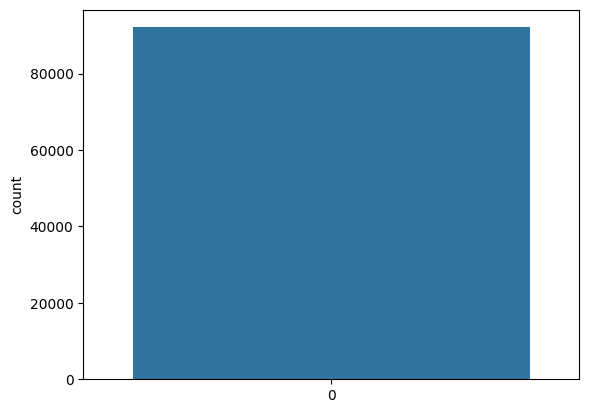

In [10]:
sns.countplot(df_train['TARGET'])
df_train['TARGET'].value_counts()

### Estimativa renda
Corresponde a renda que a pessoa deverá receber no final do período de um mês. 

A intenção ao usar esta propriedade é observar alguma correlação entre a faixa salarial e outros fatores que causam a inadimplência de uma pessoa.

A maior concentração de dados encontra-se abaixo dos 2000 reais, com assimetria à direita, sendo a mediana um salário de aproximadamente 1000 reais.

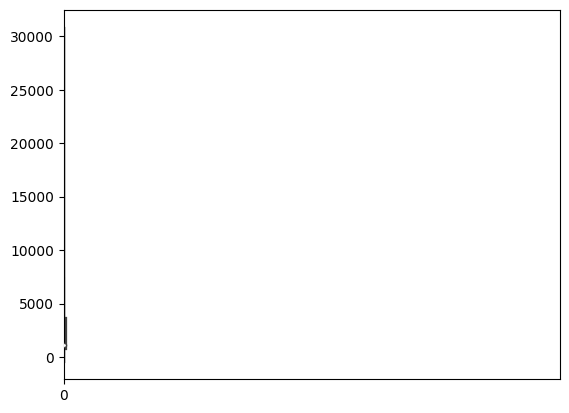

In [11]:
sns.violinplot(df_train['ESTIMATIVARENDA'])
plt.xlim(0,12000)
plt.show()

### Bolsa família
A coluna representa a quantidade de pessoas que recebem auxílio financeiro do governo.

Poderá ser relevante ao estudo, tendo em vista que o recebimento do auxílio pode indicar dificuldades financeiras. 

4% das pessoas da base de dados recebem o auxílio.

0.0    87202
1.0     3685
Name: BOLSAFAMILIA, dtype: int64

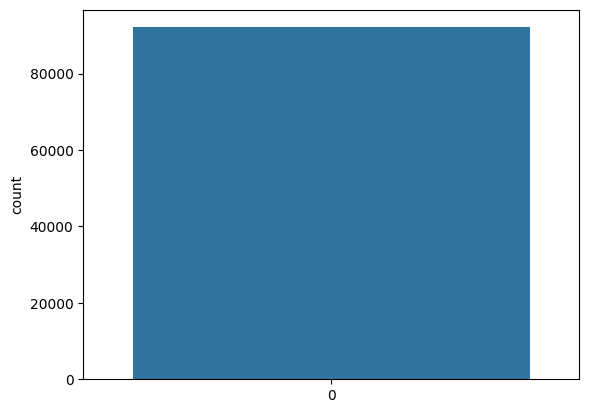

In [12]:
sns.countplot(df_train['BOLSAFAMILIA'])
df_train['BOLSAFAMILIA'].value_counts()

### Indice emprego

A coluna representa o indice de estabilidade do CPF no emprego em uma escala de valores discretos de 0 a 6, sendo 0 um emprego pouco estável e 6 um emprego muito estável.

A hipótese é que uma menor estabilidade no emprego dificulta o pagamento de uma obrigação, por isso a escolha desta propriedade para este estudo.

Na base de dados, observa-se a grande maioria das pessoas pertencentes ao grupo 0, com a menor estabilidade de emprego.

C:\Users\Lucas\AppData\Local\Temp\ipykernel_5536\1412605568.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df_train["INDICEEMPREGO"], hist=True, kde=False, rug=False )


<AxesSubplot:xlabel='INDICEEMPREGO'>

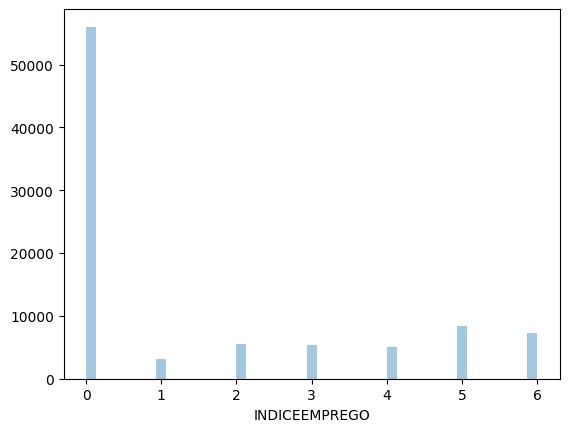

In [13]:
sns.distplot( df_train["INDICEEMPREGO"], hist=True, kde=False, rug=False )

### Porte do empregador

Indica o porte da empresa em que o CPF trabalha, com valores discretos de 0 a 4, sendo 4 o maior porte e 0, o menor.

A hipótese é de que uma pessoa que trabalha numa empresa de grande porte terá maior probabilidade de receber o salário em dia do que aquela que trabalha para uma empresa de pequeno porte ou é autônoma, sendo menos provável que seja inadimplente.

Também poderá ser feita a correlação entre o porte da empresa e o indice de estabilidade no emprego.

Nesta base de dados, percebe-se a grande maioria das pessoas inseridas no grupo de empregadores de porte 0.

C:\Users\Lucas\AppData\Local\Temp\ipykernel_5536\1063327583.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['PORTEEMPREGADOR'],hist=True, kde=False, rug=True)


<AxesSubplot:xlabel='PORTEEMPREGADOR'>

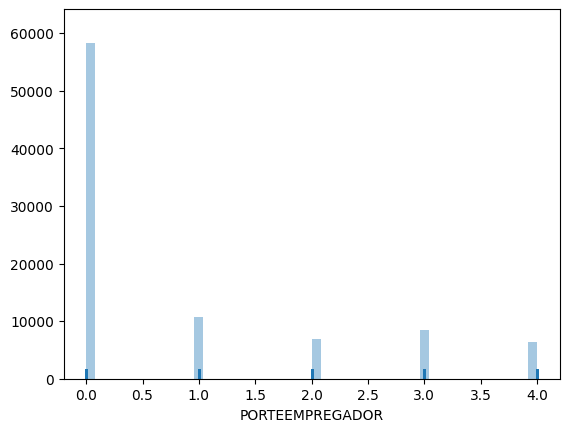

In [14]:
# PORTEEMPREGADOR
df_train['PORTEEMPREGADOR'].unique()
sns.distplot(df_train['PORTEEMPREGADOR'],hist=True, kde=False, rug=True)

#LUCAS UNI

MEDIA DA RENDA NA REGIÃO

Indica a média da renda das pessoas que vivem no mesmo CEP do proponente

A hipótese é que dependendo de onde a região está localizada poderá de certa forma ser influenciada no salario(trabalho) das pessoas, resultando em uma chance de pagamento mais efetiva.

Primeiro quartil onde possui 25% conseguimos ver que possuem uma renda media de até R$2.000.

Sendo possivel observar que a mediana das medias renda por cep no intervalo simetrico fica proximo dos R$2.200 e valores extremos acima de R$4300


<AxesSubplot:xlabel='MEDIARENDACEP'>

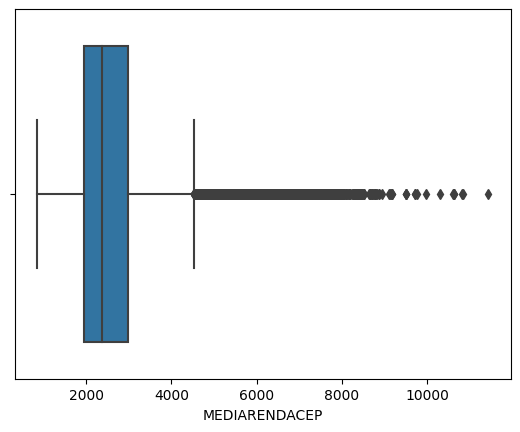

In [15]:
sns.boxplot(x = df_train["MEDIARENDACEP"])
# plt.show()


BOLSA FAMILIA NA RESIDENCIA

Indica se há pessoas que recebem o auxílio do governo naquela residência

A hipotese é que se aquela residencia possui pessoas que recebem o auxílio do governo consequentemente pode estar indicando que há dificuldades financeiras na familia.


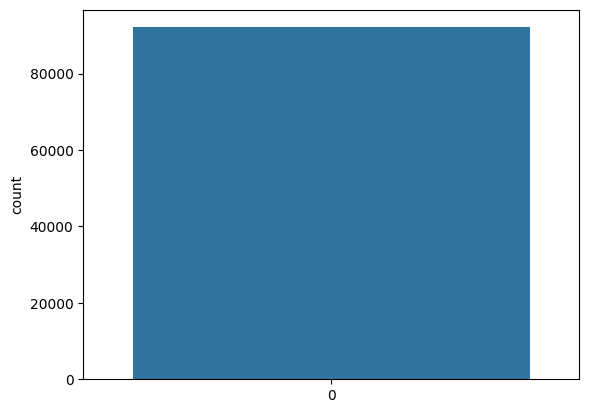

In [16]:
sns.countplot(df_train['BOLSAFAMILIACASA'])
plt.show()

MEDIA DA RENDA DA CASA

Indica o envolvimento das rendas da familia na residencia

A hipotese é que se a media da renda da casa for relevante, há formas de indicar que familiares se ajudam financeiramente resultando assim em pagamentos certos.

Sendo possivel observar que 50% é de valor de 1766.


<AxesSubplot:xlabel='MEDIARENDACASA'>

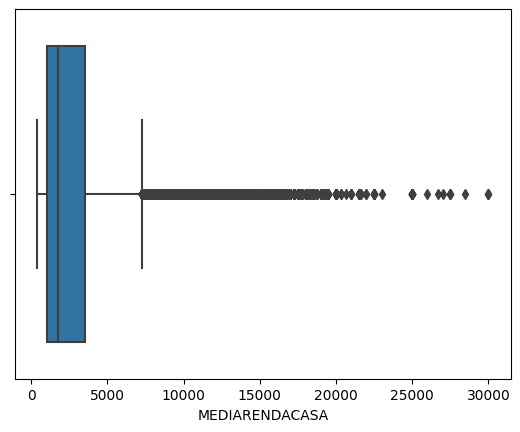

In [17]:
sns.boxplot(x = df_train["MEDIARENDACASA"])

# plt.show()


#FIM LUCAS UNI

In [18]:
# if you realize you need to further clean your data here, there is no problem, 
# yet, make sure you are describing the entire process and the rationale 
# behind your choices here

# Multivariate data analysis

In this section, you should plot at least 8 multivariate visualizations. The key here is to investigate underlying correlations and behaviors in the dataset.
Naturally, as visualizations are being created, we should end up with obvious results, yet, you should find at least **TWO** non-obvious behavior in data.

Please follow these steps for creating your visualizations:
1. State an hypothesis. The key here is to explain why you are choosing those specific variables together and what you are expecting to find.
2. Determine what kind of visualization is the most suited.
3. Report the findings and whether they corroborate or not the aforestated hypothesis.


### Hints

In this section, make sure you go beyond naive explorations. For instance, try PCA, t-SNE, and even other techniques we have not worked with during the lectures. The key here is to start to develop a critical mindset towards data analysis and our own work.

### Important

It is strictly forbidden to create multivariate visualizations using variables that were not used in the previous section (univariate analysis).

In [19]:
# again, feel free to place as many cells to plot the visualizations, 
# as well as describe to the main findings

### Porte Empregador vs Indice Emprego

A hipótese é que, quanto maior o porte do empregador, maior seria a estabilidade no emprego (indice emprego), porém este comportamento não é necessariamente verdadeiro.

O comportamento mais destacado, e esperado, é a correlação forte entre os índices 0 para porte do empregador e 0 para o indice emprego, em que 82% das pessoas com porte do empregador igual a zero, têm indice de emprego também igual a zero.

Chama a atenção que, à exceção das pessoas com porte do empregador igual a 4 (máximo), todas se concentram em sua maioria com indice de emprego igual a zero, sendo os outros indices distribuídos de forma mais equivalente.

Nos CPF com porte do empregador igual a 4, observa-se uma concentração maior de dados no indice de emprego igual a 5, com os outros indices distribuídos de forma parecida.

Ainda assim, apesar de existirem diferenças, elas são mínimas para que se conclua que as variáveis sejam fortemente correlacionadas. Apenas que se a pessoa possuir um porte do empregador igual a zero, o índice de emprego será mais provável de ser também zero, e vice-versa.

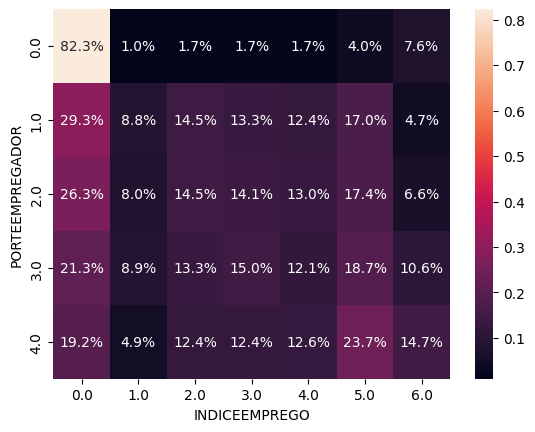

In [20]:
porte = df_train['PORTEEMPREGADOR']
indice = df_train['INDICEEMPREGO']
ctab = pd.crosstab(porte,indice, normalize='index')
sns.heatmap(ctab, annot=True, fmt='.1%')
plt.show()

### Estimativa renda vs Target

A hipótese a ser analisada a seguir é que a estimativa de renda pessoal impacta na possibilidade do CPF ser inadimplente, sendo que, quanto menor a renda, maior a probabilidade de inadimplência.

Para a análise, a base de dados foi separada em 6 faixas salariais. Nisto observa-se que a maior parte dos inadimplentes (60%) encontra-se na faixa salarial de 0 a 1000 reais. Porém, conforme visto na análise univariada de estimativa de renda, a maior concentração da base de dados encontra-se nesta faixa, então não seria razoável tal comparação.

Para obtenção de conclusões mais assertivas então, foram analisadas as quantidades de inadimplentes por faixa salarial.

Pode-se comparar a taxa de inadimplência de cada faixa salarial com a porcentagem total de inadimplentes, observada na análise da variável 'TARGET', apresentado anteriormente, em aproximadamente 10%.

Observa-se, então, que a faixas salariais de 0-1000 e 1000-2000 possuem uma quantidade de inadimplentes levemente superior à média total, e vai decrescendo conforme aumenta a faixa salarial, confirmando a hipótese proposta.




In [21]:
#criando coluna de faixa de renda
df_train['fxRenda'] = pd.cut(df_train['ESTIMATIVARENDA'],
                               [-float('inf'), 1000, 2000, 4000, 6000, 10000, float('inf')])
df_train.head(3)

,TEMPOCPF,DISTCENTROCIDADE,DISTZONARISCO,QTDENDERECO,QTDEMAIL,QTDCELULAR,CELULARPROCON,QTDFONEFIXO,TELFIXOPROCON,INDICEEMPREGO,...,QTDDECLARACAO10,QTDDECLARACAOREST10,QTDDECLARACAOPAGAR10,RESTITUICAOAGENCIAALTARENDA,BOLSAFAMILIA,ANOSULTIMARESTITUICAO,ANOSULTIMADECLARACAO,ANOSULTIMADECLARACAOPAGAR,TARGET,fxRenda
0,11.0,3338.0,166753.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,"(-inf, 1000.0]"
1,19.0,5792.0,4820.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,0.0,"(-inf, 1000.0]"
2,26.0,1550.0,502.0,1.0,0.0,2.0,0.0,1.0,0.0,4.0,...,2.0,0.0,0.0,0.0,0.0,NaN,4.0,NaN,0.0,"(2000.0, 4000.0]"


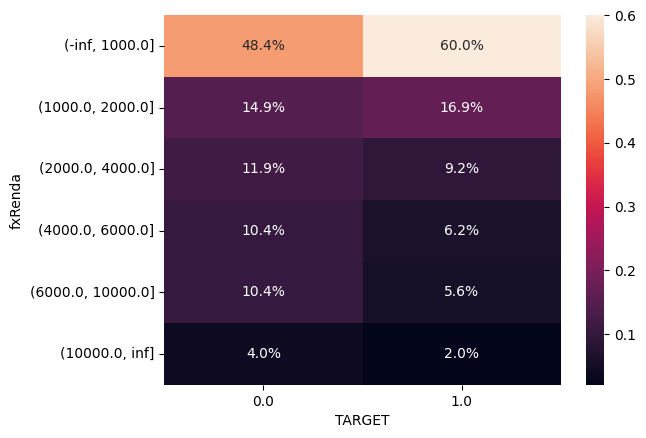

In [22]:
ctab = pd.crosstab([df_train['fxRenda']], 
                   df_train['TARGET'], normalize='columns')
sns.heatmap(ctab, annot=True, fmt='.1%')
plt.show()

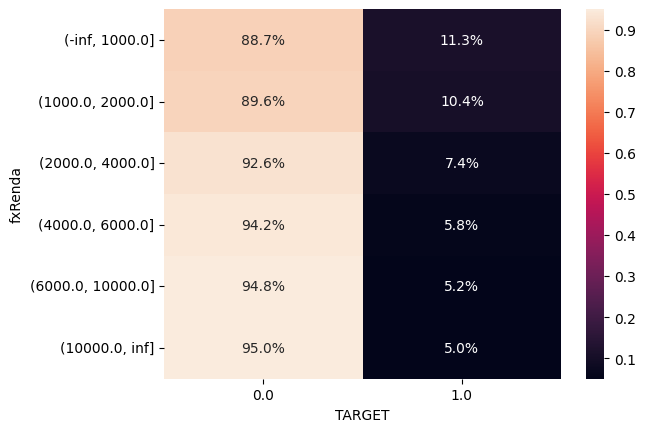

In [23]:
ctab = pd.crosstab([df_train['fxRenda']], 
                   df_train['TARGET'], normalize='index')
sns.heatmap(ctab, annot=True, fmt='.1%')
plt.show()

#lucas multivalorado

MEDIA RENDA CASA X TARGET


Está sendo utilizada a variavel de referencia a media da renda na casa com a pessoa ser inadimplente ou não. 

A hipótese é que se a média renda da casa for elevada, a possibilidade de uma pessoa ser bom pagador é boa, pois mesmo a própria pessoa tendo renda baixa outras pessoas na residência pode contribuir.

Para a analise a base foi separada em 3 faixas salariais, sendo entre menores da media, entre a media e acima.

É possivel verificar que 10,8% com renda inferior a 2000 são inadimplementes e que quanto maior a renda da casa menor o indice de inadimplência.

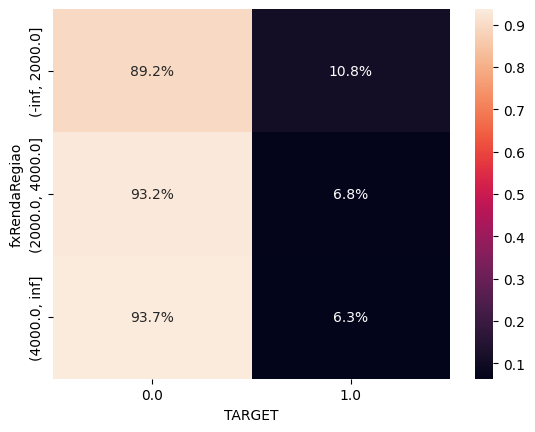

In [24]:
mediarendaCasa = df_train['MEDIARENDACASA']
mediaregiao = df_train['MEDIARENDACEP']
targ = df_train['TARGET']

#criando coluna de faixa etária
df_train['fxRendaRegiao'] = pd.cut(df_train['MEDIARENDACASA'],
                               [-float('inf'), 2000, 4000,
                                float('inf')])
mediarendaReg = df_train['fxRendaRegiao']
ctab = pd.crosstab(mediarendaReg,targ, normalize='index')
sns.heatmap(ctab, annot=True, fmt='.1%')
plt.show()
#sns.boxplot(mediaregiao,mediarendaCasa)
#plt.show()

C:\Users\Lucas\AppData\Local\Temp\ipykernel_5536\3065109482.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_inad['MEDIARENDACASA'], kde=False)
C:\Users\Lucas\AppData\Local\Temp\ipykernel_5536\3065109482.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_n_inad['MEDIARENDACASA'], kde=F

<AxesSubplot:xlabel='MEDIARENDACASA'>

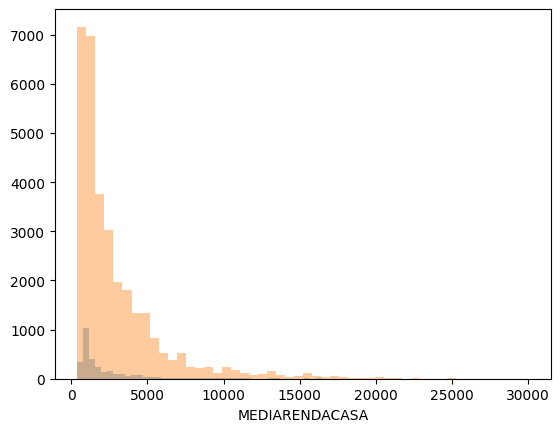

In [25]:
df_inad = df_train[df_train['TARGET'] == 1]
df_n_inad= df_train[df_train['TARGET'] == 0]
sns.distplot(df_inad['MEDIARENDACASA'], kde=False)
sns.distplot(df_n_inad['MEDIARENDACASA'], kde=False)

LUCAS 2 MULTIVALORADO

MEDIA RENDA CASA X MEDIA RENDA REGIAO


Está sendo utilizada a variavel de referencia a media da renda na casa com a media da renda na regiao. 

A hipotese é que podera ser visto a maior concentração de rendas medias na região, determinando a oportunidade de ser bom pagador.

Para a analise a base foi separada comparada em um grafico de scatter.

É possivel verificar que há uma concentração maior até a faixa de R$8.000 sendo mais repetida entre R$2.000 e R$4.000

In [ ]:
mediarendaCasa = df_train['MEDIARENDACASA']
mediaregiao = df_train['MEDIARENDACEP']
sns.scatterplot(mediaregiao, mediarendaCasa)
plt.show()
#sns.boxplot(mediaregiao,mediarendaCasa)
#plt.show()

# Final Plots

In this section, you need to enhance 3 multivariate visualizations that were presented in the previous section of the report.
The key here is to enhance these visualizations with the goal of presenting them for an audience that is not familiar with the dataset used or with data analysis.
**Therefore, make sure that its size, colors, textures, etc, are appropriate are convey the right information to the audience.**

For your final plots, make sure you follow these steps:
1. Present the plot
2. Provide a description of the visualization, including the main findings that we can extract from it


**Hint: take a look at the checklist also made available based on the work of Evergreen.**

In [ ]:
# your code goes here

# Digest

In this section you should write down all the main findings of this exploratory data analysis. Furthermore, you should provide a reflection about your own work and effort during the module, highlighting what you believe you have done well and what you should have done differently. This digest should have at least 2500 characters (no spaces).

```
Add your text here.
```

# Final Steps


1. Save this report as a jupyter notebook (`.ipynb`)
2. Save a copy of this report as a PDF file (`.pdf`)
3. Copy the dataset
4. Zip it all together within a single file (`<your_team_name>.zip`)
5. Send it over using Blackboard.